In [1]:
import pandas as pd

In [2]:
import matplotlib

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.9.2


In [ ]:
df = pd.read_csv('noise_winter_q1.csv', delimiter=',')
df_grouped = df.groupby('complaint_desc')['count'].sum().reset_index()
df_grouped = df_grouped.sort_values('count', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_grouped['complaint_desc'], df_grouped['count'], color='skyblue')
plt.xlabel('Total Complaints')
plt.ylabel('Noise Complaint Description')
plt.title('Noise Complaints by Reason in Winter Q1')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df = pd.read_csv('noise_warm_months.csv', delimiter=',')
df_grouped = df.groupby('complaint_desc')['count'].sum().reset_index()
df_grouped = df_grouped.sort_values('count', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_grouped['complaint_desc'], df_grouped['count'], color='skyblue')
plt.xlabel('Total Complaints')
plt.ylabel('Noise Complaint Description')
plt.title('Noise Complaints by Reason in Spring and Summer')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df = pd.read_csv('noise_fall_winter.csv', delimiter=',')
df_grouped = df.groupby('complaint_desc')['count'].sum().reset_index()
df_grouped = df_grouped.sort_values('count', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_grouped['complaint_desc'], df_grouped['count'], color='skyblue')
plt.xlabel('Total Complaints')
plt.ylabel('Noise Complaint Description')
plt.title('Noise Complaints by Reason in Fall and Winter')
plt.tight_layout()

# Show the plot
plt.show()

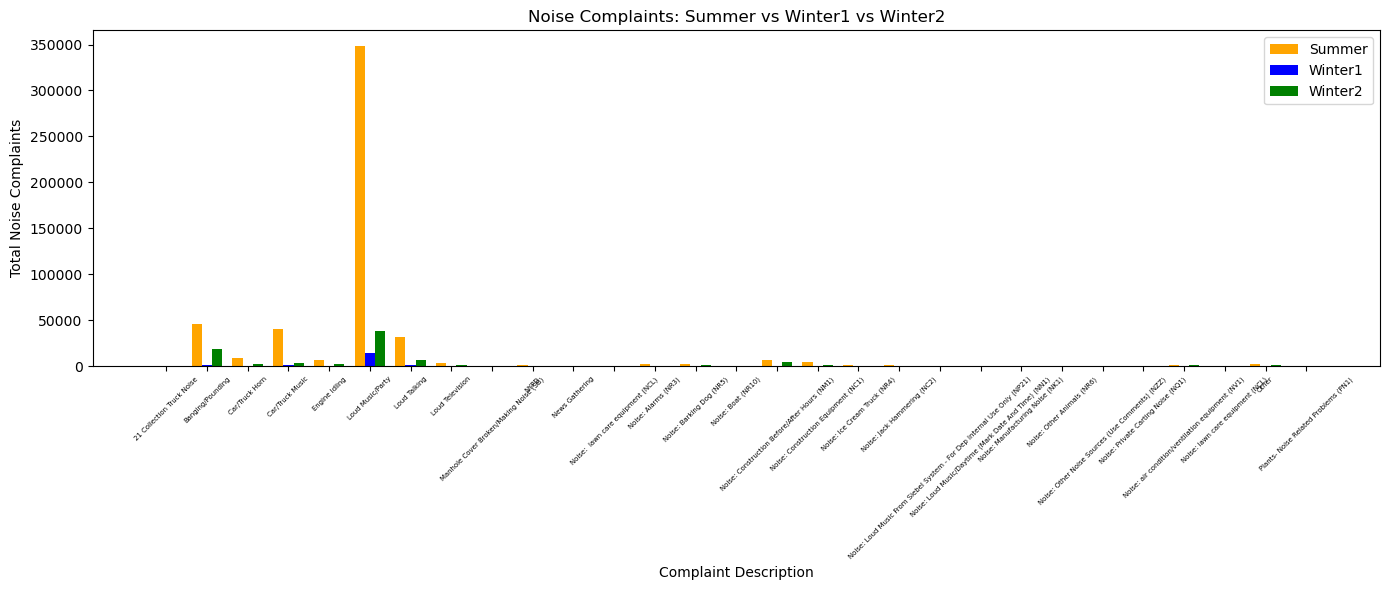

In [8]:

# Load the data
df_winter1 = pd.read_csv('noise_fall_winter.csv', delimiter=',')
df_winter2 = pd.read_csv('noise_winter_q1.csv', delimiter=',')
df_summer = pd.read_csv('noise_warm_months.csv', delimiter=',')

# Group by 'complaint_desc' and sum the counts
df_summer_grouped = df_summer.groupby('complaint_desc')['count'].sum().reset_index()
df_winter1_grouped = df_winter1.groupby('complaint_desc')['count'].sum().reset_index()
df_winter2_grouped = df_winter2.groupby('complaint_desc')['count'].sum().reset_index()

# Merge the three datasets on 'complaint_desc', using outer joins and filling missing values with 0
df_combined = pd.merge(df_summer_grouped, df_winter1_grouped, on='complaint_desc', how='outer', suffixes=('_summer', '_winter1')).fillna(0)
df_combined = pd.merge(df_combined, df_winter2_grouped, on='complaint_desc', how='outer').fillna(0)

# Rename columns for consistency (after the second merge, the 'count' column from winter2 won't have a suffix)
df_combined.rename(columns={'count': 'count_winter2'}, inplace=True)

# Plotting the data
plt.figure(figsize=(14, 6))

# Bar width and bar positions
bar_width = 0.25
index = range(len(df_combined))

# Plot summer noise complaints
plt.bar(index, df_combined['count_summer'], width=bar_width, label='Summer', color='orange')

# Plot winter1 noise complaints (shifted to the right for side-by-side comparison)
plt.bar([i + bar_width for i in index], df_combined['count_winter1'], width=bar_width, label='Winter1', color='blue')

# Plot winter2 noise complaints (shifted further to the right for side-by-side comparison)
plt.bar([i + 2 * bar_width for i in index], df_combined['count_winter2'], width=bar_width, label='Winter2', color='green')

# Adding labels and title
plt.xlabel('Complaint Description')
plt.ylabel('Total Noise Complaints')
plt.title('Noise Complaints: Summer vs Winter1 vs Winter2')

# Adjust the x-axis labels (complaint descriptions) and reduce font size
plt.xticks([i + bar_width for i in index], df_combined['complaint_desc'], rotation=45, fontsize=5)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
